<h1>Extracting and Visualizing Stock Data</h1>



Extracting essential data from a dataset and displaying it is a necessary part of data science.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 144.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 132.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=39f792312a26faf4c299ea5aa88179de9895332315e4e00b1a1c29fc463f5bf9
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
Successfully built multitasking
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 92.8 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. 


In [4]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

 Use yfinance to Extract Stock Data


In [ ]:
Tesla = yf.Ticker("TSLA")
Tesla_data.reset_index(inplace=True)
Tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Use Webscraping to Extract Tesla Revenue Data


In [46]:
url=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data= requests.get(url).text

In [47]:
beautiful_soup=BeautifulSoup(html_data,'html.parser')

In [48]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for table in beautiful_soup.find_all("table"):
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

for row in tesla_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat(
        [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
        ignore_index=True
    )

In [49]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [51]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [52]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Use yfinance to Extract Stock Data


In [56]:
GameStop= yf.Ticker("GME")

In [57]:
gme_data = GameStop.history(period="max")

In [58]:
gme_data.reset_index(inplace=True)
print(gme_data)

                          Date       Open       High        Low      Close  \
0    2002-02-13 00:00:00-05:00   1.620129   1.693350   1.603296   1.691667   
1    2002-02-14 00:00:00-05:00   1.712707   1.716073   1.670626   1.683250   
2    2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
3    2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
4    2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                        ...        ...        ...        ...        ...   
6015 2026-01-09 00:00:00-05:00  21.280001  21.730000  21.049999  21.230000   
6016 2026-01-12 00:00:00-05:00  21.080000  21.309999  20.920000  20.980000   
6017 2026-01-13 00:00:00-05:00  20.990000  21.209999  20.840000  21.020000   
6018 2026-01-14 00:00:00-05:00  21.000000  21.080000  20.790001  21.020000   
6019 2026-01-15 00:00:00-05:00  20.969999  21.420000  20.879999  21.360001   

        Volume  Dividends  Stock Splits  
0     76216000       

Use Webscraping to Extract GME Revenue Data


In [5]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

In [6]:
beautiful_soup = BeautifulSoup(html_data_2,'html.parser')

In [30]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in beautiful_soup.find_all("table"):
    if "GameStop" in table.text and "Revenue" in table.text:
        gme_table = table
        break

for row in gme_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text.strip()
    revenue = col[1].text.strip()

    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],ignore_index=True)


In [31]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [32]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [33]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


Plot Tesla Stock Graph


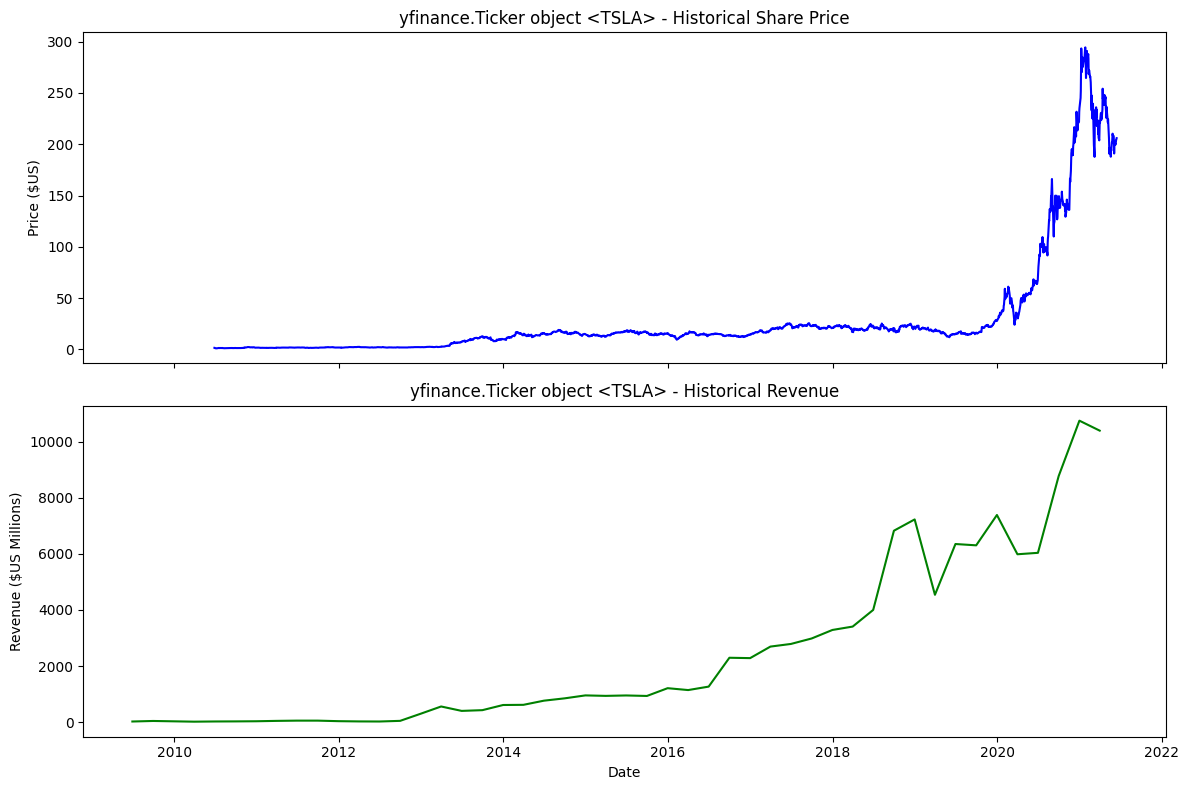

In [53]:
make_graph(Tesla_data,tesla_revenue,Tesla)

Plot GameStop Stock Graph


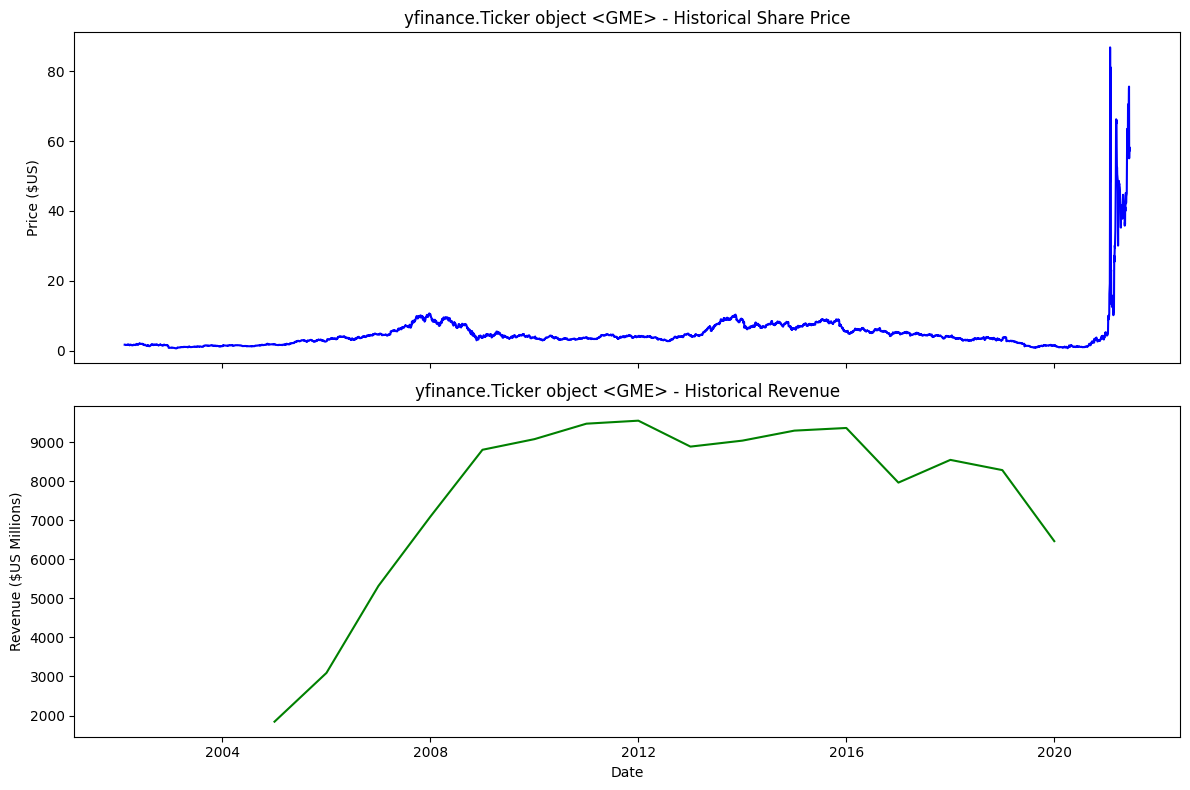

In [59]:
make_graph(gme_data,gme_revenue,GameStop)